<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 2</h2></center>
<center><h3>Fundamentos: Análisis espectral</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Jhonnathan Ordenes</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

# Ayudantía
## 1.1 Carga archivos y carga datos en python
<p align="justify">
Una de las tareas más importantes es la de cargar archivos que incluyan datos para el procesamiento.

<p align="justify">
Debes cargar los dos archivos en formato txt y CSV, adquirir los datos y presentarlos en graficos usando la librería Matplotlib
   

<Figure size 640x480 with 0 Axes>

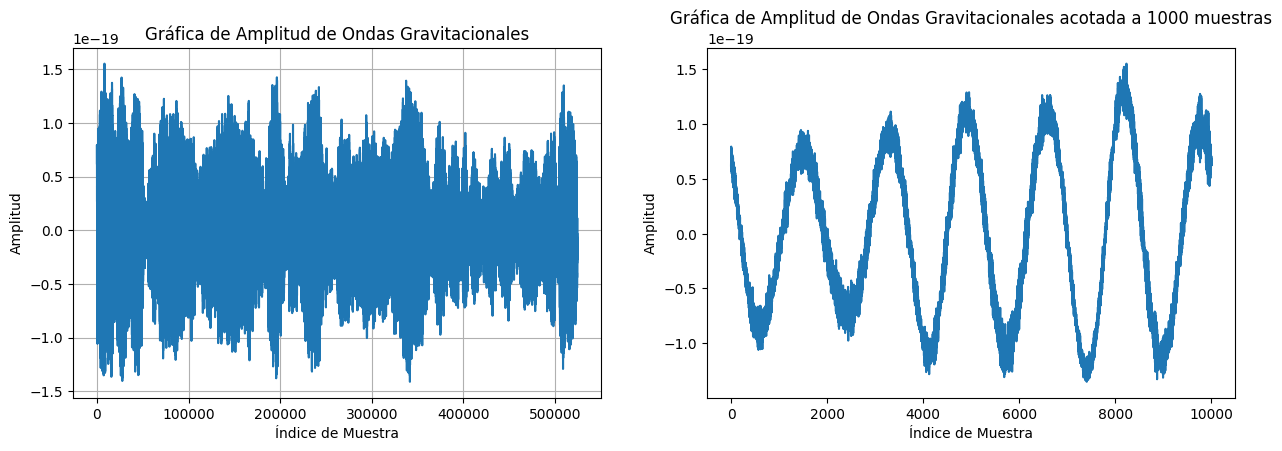

[   0    1    2 ... 9997 9998 9999]


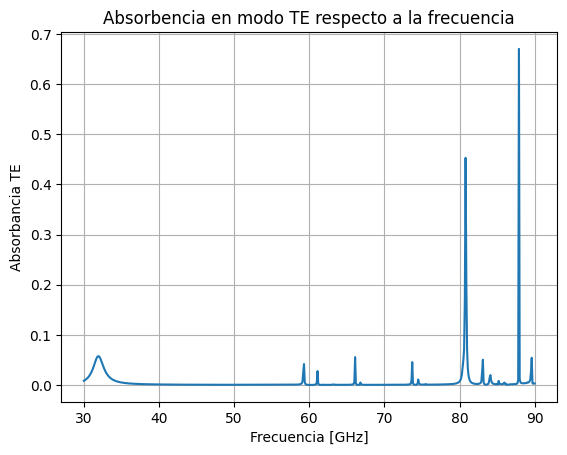

In [13]:
import pandas as pd
import gzip
import shutil
import matplotlib.pyplot as plt
import numpy as np

ruta_archivo_comprimido = 'H-H1_GWOSC_16KHZ_R1-1268431079-32.txt.gz' #Ingreso la ruta de el archivo que quiero descomprimir

ruta_archivo_descomprimido = 'H-H1_GWOSC_16KHZ_R1-1268431079-32.txt' #Ingreso la ruta donde quiero descomprimirlo, el nombre y el formato

with gzip.open(ruta_archivo_comprimido, 'rb') as archivo_comprimido:   #Abre el comprimido en modo lectura binaria
    with open(ruta_archivo_descomprimido, 'wb') as archivo_descomprimido:  #Se guardan los datos descomprimidos
        shutil.copyfileobj(archivo_comprimido, archivo_descomprimido) # Esto copia todo el contenido del archivo comprimido hacia el descomprimido 

# Lee el contenido del archivo y guarda los datos en una lista
with open("H-H1_GWOSC_16KHZ_R1-1268431079-32.txt", "r") as file:
    lines = file.readlines()  # Lee todas las líneas del archivo
    data = [float(line.strip()) for line in lines[4:]]  # Ignora las primeras 4 líneas y convierte el resto en números flotantes

#Ignoramos esas 4 primeras lineas ya que son informacion que no nos sirve
plt.figure(1)
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
plt.plot(data) # Grafico la variable lista_float
plt.xlabel('Índice de Muestra')
plt.ylabel('Amplitud')
plt.title('Gráfica de Amplitud de Ondas Gravitacionales')
plt.grid(True) #Recuadros dentro del grafico



x = np.arange(10000) # crear un arreglo de 0 a 10000
y = data[0:10000] # Toma los datos de 0 a 10000
plt.subplot (2,2,2)
plt.plot(x, y)
plt.xlabel('Índice de Muestra')
plt.ylabel('Amplitud')
plt.title('Gráfica de Amplitud de Ondas Gravitacionales acotada a 1000 muestras')
plt.show()

df = pd.read_csv("AbsorbanceTE_0-0.csv")

plt.figure(2)
plt.plot (df["Freq [GHz]"], df["AbsorbanceTE []"])
plt.xlabel ("Frecuencia [GHz]")
plt.title ("Absorbencia en modo TE respecto a la frecuencia")
plt.ylabel ("Absorbancia TE")
plt.grid (True)


print(x)


## 1.2 Generar una imagen de una función trigronométrica (función bidimensional) 
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos meustra una onda senoidal. 


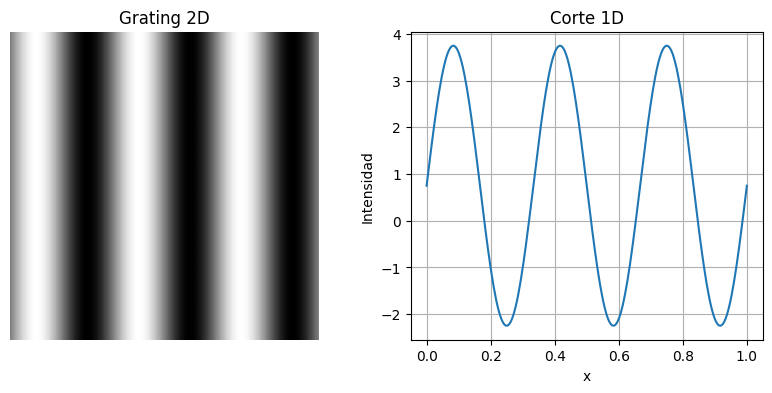

<Figure size 640x480 with 0 Axes>

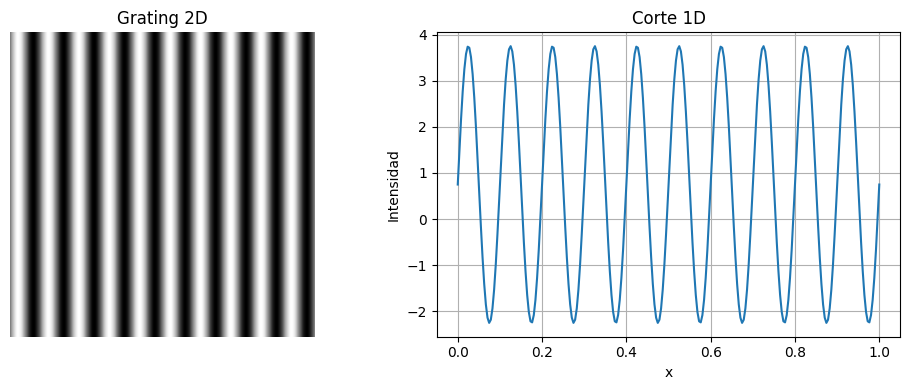

In [14]:
# Parámetros y malla 1
x = np.linspace(0, 1, 256)
X = np.tile(x, (256, 1))
I = 0.75 + 3 * np.sin(2 * np.pi * 3 * X)

# Parámetros y malla 2
x1 = np.linspace(0, 1, 256)
X1 = np.tile(x1, (256, 1))
I1 = 0.75 + 3 * np.sin(2 * np.pi * 10 * X1)

# Mostrar imagen y corte horizontal
plt.figure(1)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(I, cmap='gray', extent=(0, 1, 0, 1))
plt.title("Grating 2D")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(x, I[128])
plt.title("Corte 1D")
plt.xlabel("x")
plt.grid()
plt.ylabel("Intensidad")

plt.figure(1)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(I1, cmap='gray', extent=(0, 1, 0, 1))
plt.title("Grating 2D")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(x1, I1[128])
plt.title("Corte 1D")
plt.xlabel("x")
plt.grid()
plt.ylabel("Intensidad")

plt.tight_layout()
plt.show()


## 2. Señal
<p align="justify">
Crea una señal continua (la suma de dos senoidales/cosenoidales, exponenciales) que utilizarás para las demostraciones siguientes. Presenta la función que usaste en una gráfica de tal forma que la ecuación esté incluida en dicha gráfica.

Incluye la ecuación en una celda de tu notebook usando LATEX.


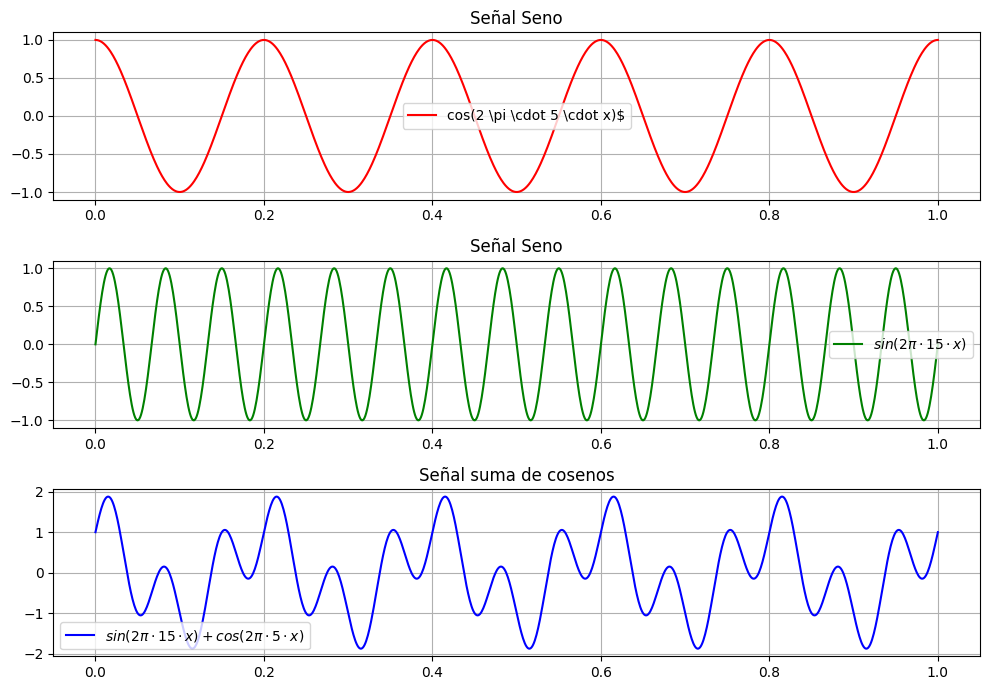

In [15]:
# Definir los parámetros de la función
f1 = 5  # Frecuencia en Hz funcion coseno
f2 = 15 # Frecuencia en Hz funcion seno
x = np.linspace(0, 1, 1000)  # Crear un rango de valores para x
y1 = np.cos(2 * np.pi * f1 * x)  # Función de coseno
y2 = np.sin(2 * np.pi * f2 * x) # Funcion de seno
y3 = y1 + y2

# Graficar la función
plt.figure(figsize=(10,7))

plt.subplot(3,1,1)
plt.plot(x,y1, color="red", label="cos(2 \pi \cdot 5 \cdot x)$")
plt.title("Señal Seno")
plt.grid()
plt.legend()

plt.subplot(3,1,2)
plt.plot(x,y2, color="green", label="$sin(2 \pi \cdot 15 \cdot x)$")
plt.title("Señal Seno")
plt.grid()
plt.legend()

plt.subplot(3,1,3)
plt.plot(x,y3, color="blue", label="$sin(2 \pi \cdot 15 \cdot x) + cos(2 \pi \cdot 5 \cdot x)$")
plt.title("Señal suma de cosenos")

plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

1. $f_1(x) =  \cos(2\pi + 5\cdot x )$
2. $f_2(x) = \sin (2\pi +15\cdot x)$
3. $f_1(x) +f_2(x) = \cos(2\pi + 5\cdot x ) + \sin (2\pi +15\cdot x)$

## 3. Sampleo
<p align="justify">
En este punto debes comprobar como se da la operación de sampleo y que sucede ante cambios en el intervalo de sampleo.    


### 3.1 Crea una señal impulso (delta) y desplazala
Para esto puedes usar alguna librería de python

Para generar el impulso se hace uso de la libreria PsiPy y se importa la funcion signal.

Vector de impulsos:  [1. 0. 0. 0. 0. 0. 0. 0. 0.]
Vector de impulsos desplazado:  [0. 0. 0. 0. 1. 0. 0. 0. 0.]


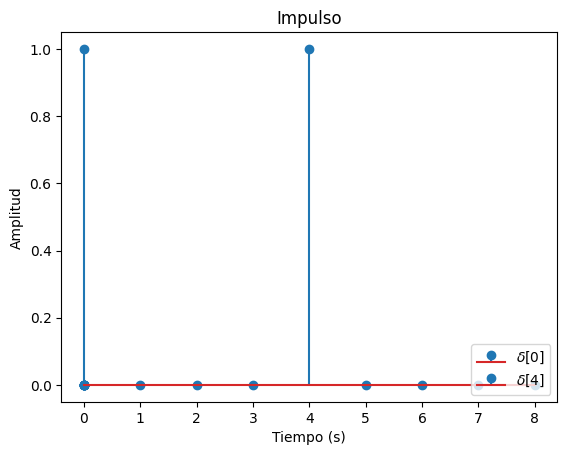

In [16]:
from scipy import signal
impulso1 = signal.unit_impulse(9) # delta[0]
impulso2 = signal.unit_impulse(9, idx=4) # delta[4], desplazado dos muestras
print("Vector de impulsos: ",impulso1)
print("Vector de impulsos desplazado: ",impulso2)

plt.stem(np.zeros(len(impulso1)), impulso1)
plt.stem(impulso2)
plt.legend(["$δ[0]$", "$δ[4]$"], loc="lower right")
plt.title("Impulso")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()

### 3.2 Genere una señal Senoidal y realice la operación de sampleo
Puedes utilizar el método "stem" de matplotlib para plotear el resultado.

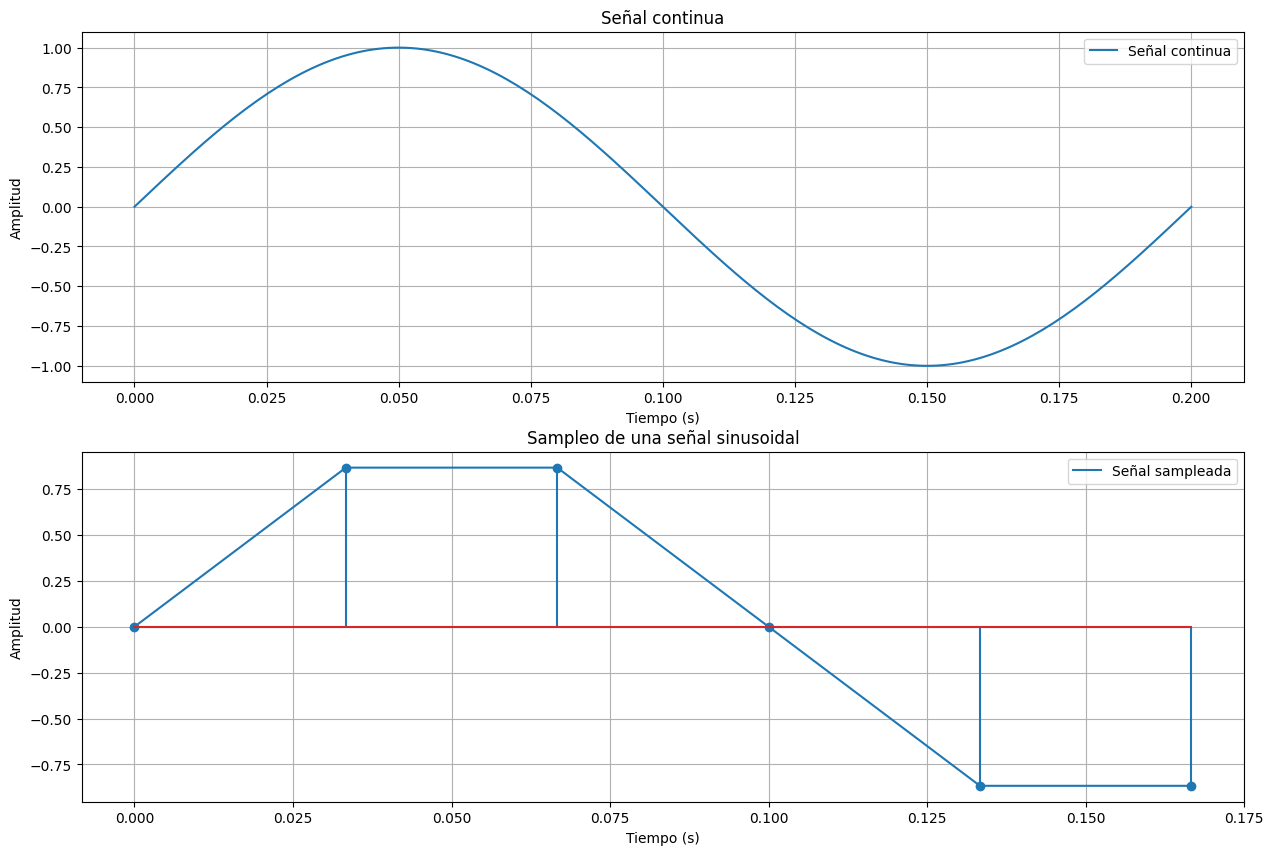

In [17]:
#Definimos parametros

amplitud = 1            # Amplitud
frecuencia = 5          # Frecuencia en Hz
f_muestreo = 30 # Frecuencia de muestreo (mínimo 2*f por Teorema de Nyquist)
tiempo = 1  #Duración de la señal


tiempo_continuo=np.linspace(0, 1/frecuencia, 200) #señal continua
#De 0, tiempo, cantidad de puntos

tiempo_sampleo = np.arange(0, 1/frecuencia , 1/f_muestreo)  # tiempo discreto (sampleado)  np.arange(start, stop, step) la función np.arange genera un arreglo de valores en un rango determinado

#De 0, tiempo, periodo de muestreo

# Señal continua
continua = amplitud * np.sin(2 * np.pi * frecuencia * tiempo_continuo)

# Señal sampleada
sampleada = amplitud * np.sin(2 * np.pi * frecuencia * tiempo_sampleo)

plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
plt.plot(tiempo_continuo, continua, label="Señal continua")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal continua")
plt.legend()
plt.grid()


plt.subplot(2,1,2)
plt.plot(tiempo_sampleo, sampleada, label="Señal sampleada")
plt.stem(tiempo_sampleo, sampleada)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Sampleo de una señal sinusoidal")
plt.legend()
plt.grid()

plt.show()


### 3.3 Genere una señal Triangular y realice la operación de sampleo

Para realizar la señal triangular se hara uso de la libreria SciPy.

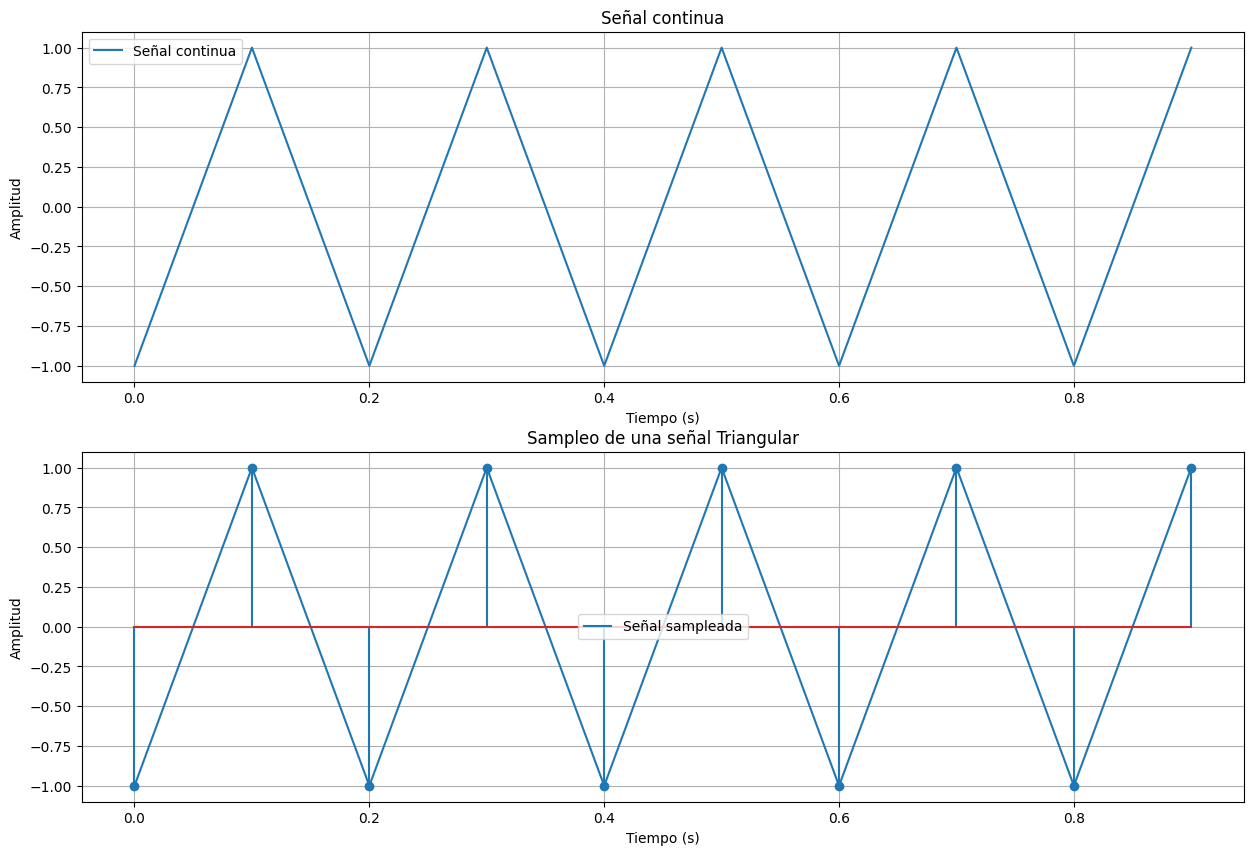

In [18]:

#Definimos parametros

amplitud = 1            # Amplitud
frecuencia = 5          # Frecuencia en Hz
f_muestreo = 10 # Frecuencia de muestreo (mínimo 2*f por Teorema de Nyquist)
tiempo = 1  #Duración de la señal

tiempo_continuo=np.linspace(0, 0.9, 1000) 

tiempo_sampleo = np.arange(0, 1 , 1/f_muestreo) 

continua = amplitud * signal.sawtooth(2 * np.pi * frecuencia * tiempo_continuo, width = 0.5)
sampleada = amplitud * signal.sawtooth(2 * np.pi * frecuencia * tiempo_sampleo, width = 0.5)


plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
plt.plot(tiempo_continuo, continua, label="Señal continua")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal continua")
plt.legend()
plt.grid()


plt.subplot(2,1,2)
plt.plot(tiempo_sampleo, sampleada, label="Señal sampleada")
plt.stem(tiempo_sampleo, sampleada)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Sampleo de una señal Triangular")
plt.legend()
plt.grid()

plt.show()

### 3.4 Realice la operación de sampleo sobre la señal que generaste en el punto 2

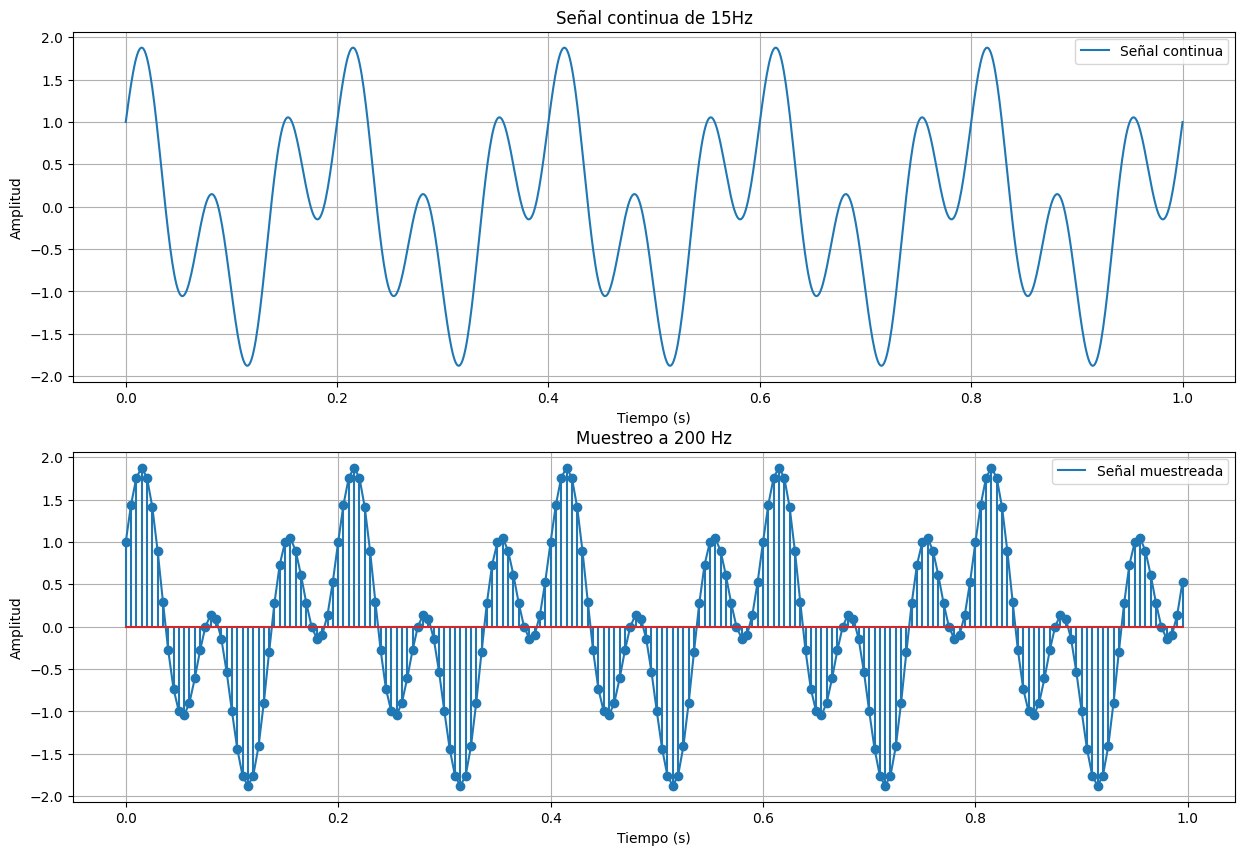

In [19]:
#Definimos parametros

amplitud = 1            # Amplitud
f1 = 5          # Frecuencia en Hz
f2 = 15         # Frecuencia en Hz
f_muestreo = [5, 10, 15, 20, 30, 50, 100, 200, 500] # Frecuencia de muestreo (mínimo 2*f por Teorema de Nyquist)
tiempo = 1  #Duración de la señal


tiempo_continuo=np.linspace(0, tiempo, 1000) #señal continua
#De 0, tiempo, cantidad de puntos

tiempo_sampleo = np.arange(0, tiempo , 1/f_muestreo[7])  # tiempo discreto (sampleado)  np.arange(start, stop, step) la función np.arange genera un arreglo de valores en un rango determinado

#De 0, tiempo, periodo de muestreo

# Señal continua
y1 = amplitud * np.cos(2 * np.pi * f1 * tiempo_continuo)  # Función de coseno
y2 = np.sin(2 * np.pi * f2 * tiempo_continuo) # Funcion de seno
continua = y1 + y2

# Señal sampleada
y1_samp = amplitud * np.cos(2 * np.pi * f1 * tiempo_sampleo)  # Función de coseno
y2_samp = np.sin(2 * np.pi * f2 * tiempo_sampleo) # Funcion de seno
sampleada = y1_samp + y2_samp

plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
plt.plot(tiempo_continuo, continua, label="Señal continua")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal continua de 15Hz")
plt.legend()
plt.grid()


plt.subplot(2,1,2)
plt.plot(tiempo_sampleo, sampleada, label="Señal muestreada")
plt.stem(tiempo_sampleo, sampleada)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Muestreo a 200 Hz")
plt.legend()
plt.grid()

plt.show()

### 3.5 Compruebe el teorema de Nyquist
Para comprobarlo, debes evaluar algunos casos:
1. la frecuencia de sampleo _f_ es mayor que la frecuencia máxima de tu señal, Fmax.
2. la frecuencia de sampleo _f_ es mayor que 2*Fmax.
3. la frecuencia de sampleo _f_ es mayor que 5*Fmax. 

<p align="justify">
Debe graficar:

1. la señal original.
2. la señal sampleada.
3. la señal reconstruida a partir del sampleo.

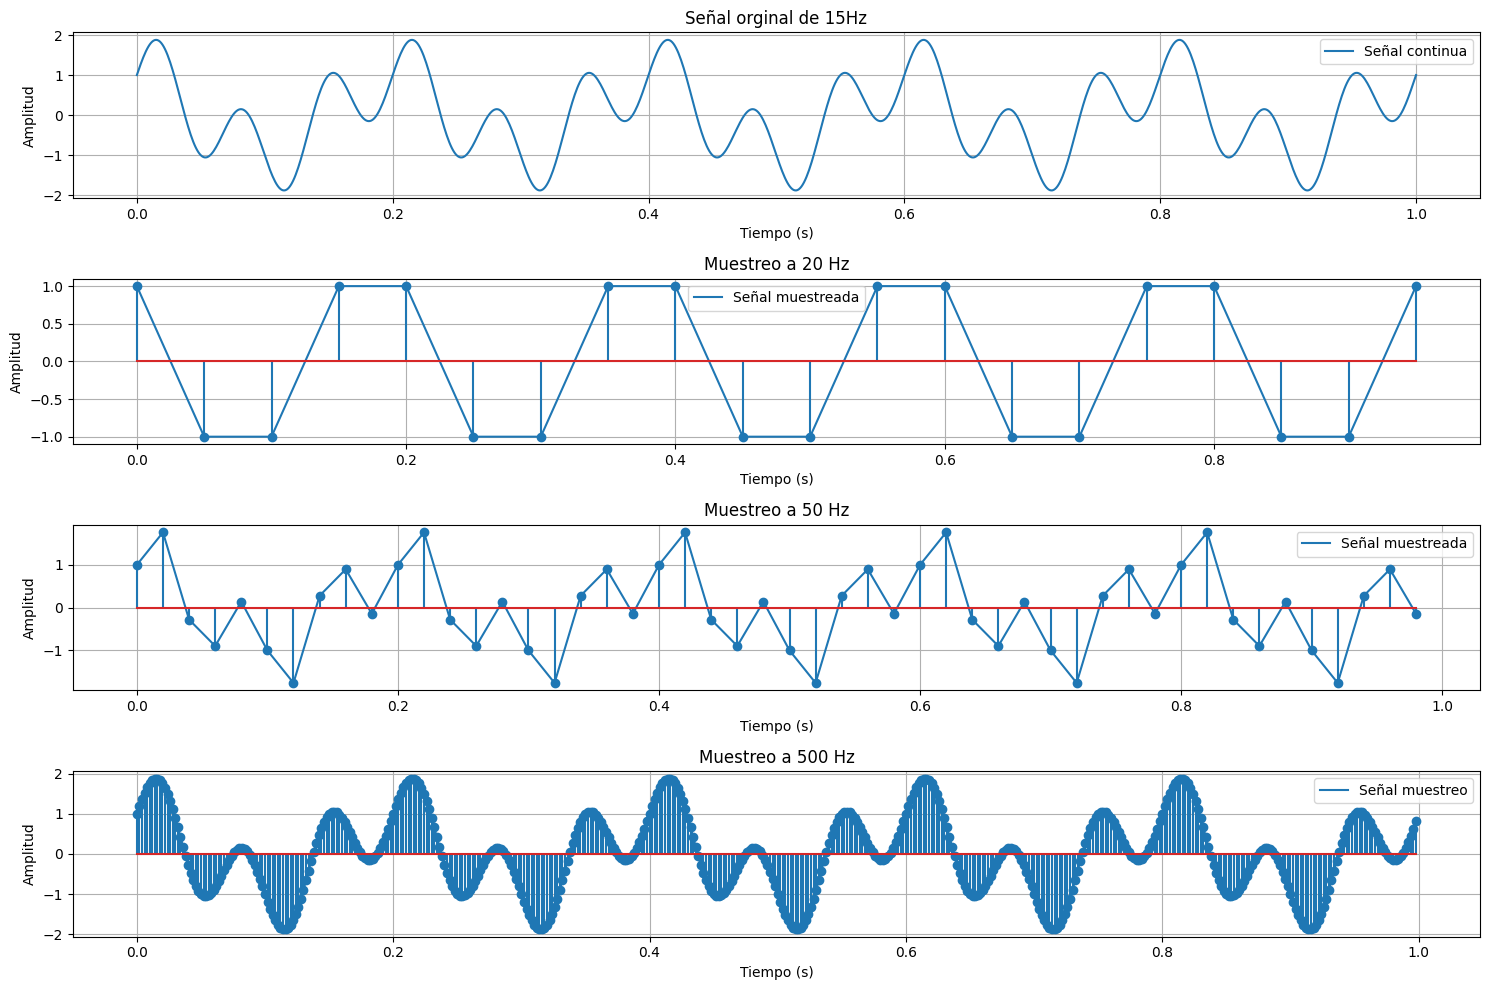

In [20]:
tiempo_sampleo = np.arange(0, tiempo , 1/f_muestreo[3])  # tiempo discreto (sampleado)  np.arange(start, stop, step) la función np.arange genera un arreglo de valores en un rango determinado
tiempo_sampleo2 = np.arange(0, tiempo , 1/f_muestreo[5])
tiempo_sampleo3 = np.arange(0, tiempo , 1/f_muestreo[8])
#De 0, tiempo, periodo de muestreo

# Señal continua
y1 = amplitud * np.cos(2 * np.pi * f1 * tiempo_continuo)  # Función de coseno
y2 = np.sin(2 * np.pi * f2 * tiempo_continuo) # Funcion de seno
continua = y1 + y2

# Señal muestreada a 20Hz
y1_samp = amplitud * np.cos(2 * np.pi * f1 * tiempo_sampleo)  # Función de coseno
y2_samp = np.sin(2 * np.pi * f2 * tiempo_sampleo) # Funcion de seno
sampleada1 = y1_samp + y2_samp

# Señal muestreada a 50Hz
y1_samp2 = amplitud * np.cos(2 * np.pi * f1 * tiempo_sampleo2)  # Función de coseno
y2_samp2 = np.sin(2 * np.pi * f2 * tiempo_sampleo2) # Funcion de seno
sampleada2 = y1_samp2 + y2_samp2

# Señal muestreada a 500Hz
y1_samp3 = amplitud * np.cos(2 * np.pi * f1 * tiempo_sampleo3)  # Función de coseno
y2_samp3 = np.sin(2 * np.pi * f2 * tiempo_sampleo3) # Funcion de seno
sampleada3 = y1_samp3 + y2_samp3

plt.figure(figsize=(15, 10))
plt.subplot(4,1,1)
plt.plot(tiempo_continuo, continua, label="Señal continua")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal orginal de 15Hz")
plt.legend()
plt.grid()

plt.subplot(4,1,2)
plt.plot(tiempo_sampleo, sampleada1, label= "Señal muestreada")
plt.stem(tiempo_sampleo, sampleada1)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Muestreo a 20 Hz")
plt.legend()
plt.grid()

plt.subplot(4,1,3)
plt.plot(tiempo_sampleo2, sampleada2, label= "Señal muestreada")
plt.stem(tiempo_sampleo2, sampleada2)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Muestreo a 50 Hz")
plt.legend()
plt.grid()

plt.subplot(4,1,4)
plt.plot(tiempo_sampleo3, sampleada3, label= "Señal muestreo")
plt.stem(tiempo_sampleo3, sampleada3)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Muestreo a 500 Hz")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## 4. Análisis en el dominio de la frecuencia


### 4.1 Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


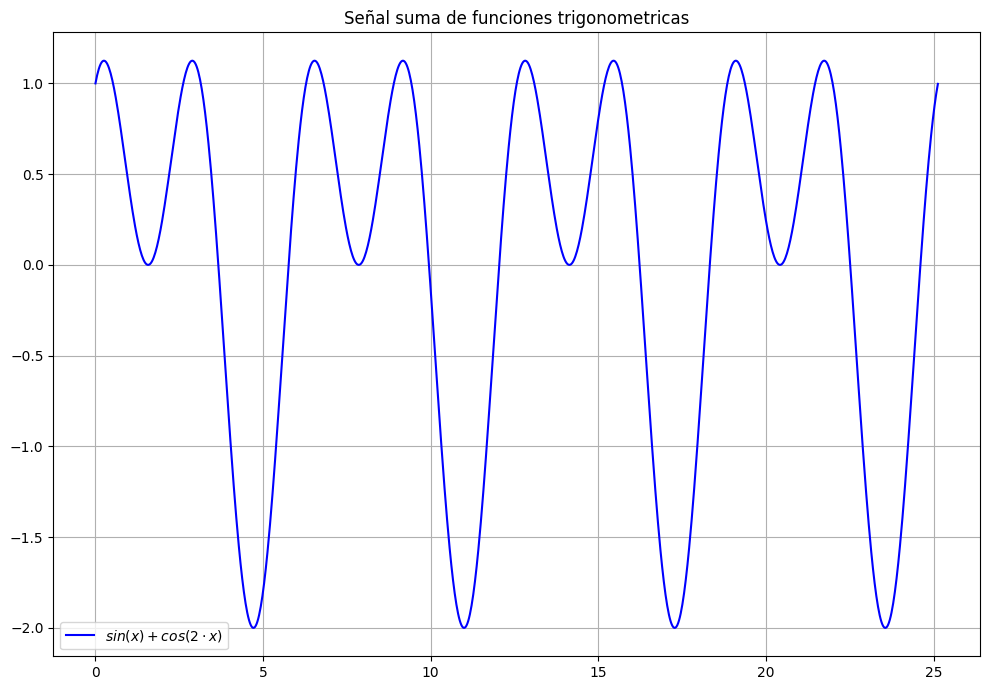

In [21]:
# Definir los parámetros de la función
x = np.linspace(0, 25.13, 1000)  # Crear un rango de valores para x
y1 = np.cos(2 * x)  # Función de coseno
y2 = np.sin(x) # Funcion de seno
y3 = y1 + y2

# Graficar la función
plt.figure(figsize=(10,7))


plt.plot(x,y3, color="blue", label="$sin(x) + cos(2 \cdot x)$")
plt.title("Señal suma de funciones trigonometricas")

plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

### 4.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

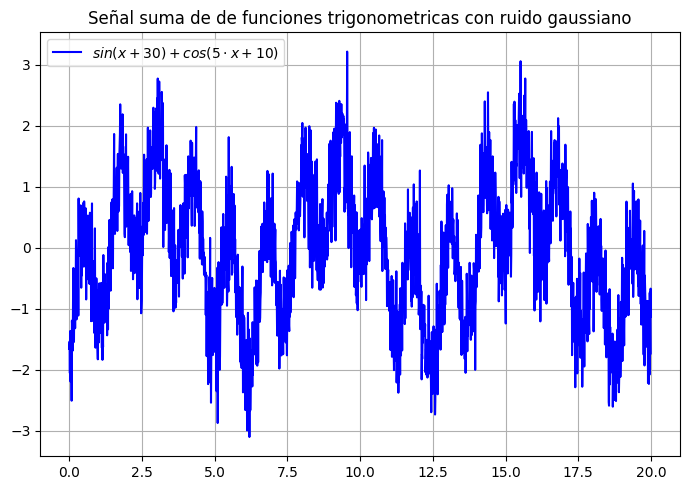

In [81]:
# Definir los parámetros de la función
x = np.linspace(0, 20, 2000)  # Crear un rango de valores para x
y1 = np.cos(5 * x + 10)  # Función de coseno
y2 = np.sin(x+30)
ruidoG =np.random.normal(0,0.5,len(x)) # Se genera un ruido
señal_con_ruido = y1 + y2 + ruidoG



# Graficar la función
plt.figure(figsize=(7,5))


plt.plot(x,señal_con_ruido, color="blue", label="$sin(x+30) + cos(5 \cdot x + 10)$")
plt.title("Señal suma de de funciones trigonometricas con ruido gaussiano")

plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

### 4.3 Obtenga la transformada de Fourier para las dos señales que generaste previamente


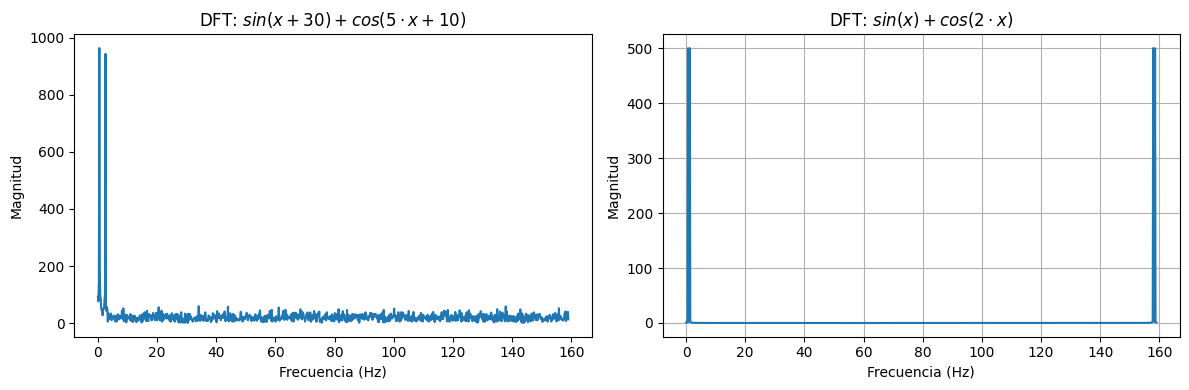

In [87]:
# DFT manual (fórmula directa)
def dft(x):
    N = len(x)
    X = []
    for k in range(N):
        sum_k = 0
        for n in range(N):
            angle = -2j * np.pi * k * n / N
            sum_k += x[n] * np.exp(angle)
        X.append(sum_k)
    return np.array(X)

# Configuración
N = 2000  # Número de muestras
x = np.linspace(0, 2 * np.pi, N, endpoint=False)  # Dominio
half = N // 2
# Aplicar DFT a cada señal
dft_con_ruido = dft(señal_con_ruido)
dft_y3 = dft(y3)

# Frecuencias
delta_x = x[1] - x[0]
frequencies = np.arange(half) / (N * delta_x)

# GRAFICAR Transformada de Fourier discreta
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(frequencies[:half], np.abs(dft_con_ruido[:half]))
plt.title("DFT: $sin(x+30) + cos(5 \cdot x + 10)$")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")

plt.subplot(1, 2, 2)
plt.plot(frequencies[:half], np.abs(dft_y3[:half]))
plt.title("DFT: $sin(x) + cos(2 \cdot x)$")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.tight_layout()
plt.show()

### 4.4 Obten un resultado Normalizado: 
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1

Un resultado normalizado, en este contexto, es una señal transformada que preserva su forma general pero está ajustada para facilitar análisis, comparación o procesamiento posterior.

para realizar este punto en base a lo conversado con el profesor despues de clases, debido a que el resultado obtenido del punto 3.1 es una señal delta dirac, la cual en si ya es una señal normalizada, se hara uso del resultado obtenido en el punto 4.1

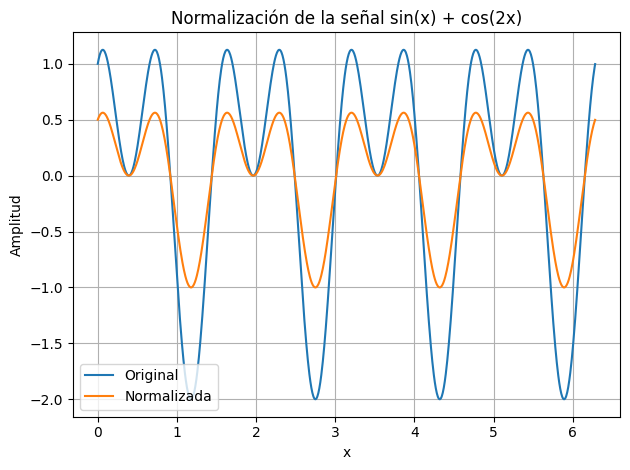

In [ ]:


# Dominio de la señal
x = np.linspace(0, 2*np.pi, 1000)
# Normalización por valor máximo absoluto
señal_normalizada = y3 / np.max(np.abs(y3))

plt.plot(x, y3, label='Original')
plt.plot(x, señal_normalizada, label='Normalizada')

plt.legend()
plt.grid(True)
plt.title('Normalización de la señal sin(x) + cos(2x)')
plt.xlabel('x')
plt.ylabel('Amplitud')
plt.tight_layout()
plt.show()


### 4.5 Encuentra la transformada inversa de Fourier
_Solo para una señal de las dos que generaste inicialmente_.

En este caso puede usar una librería. 

Explica en detalle que hace la librería y el resultado que arroja.

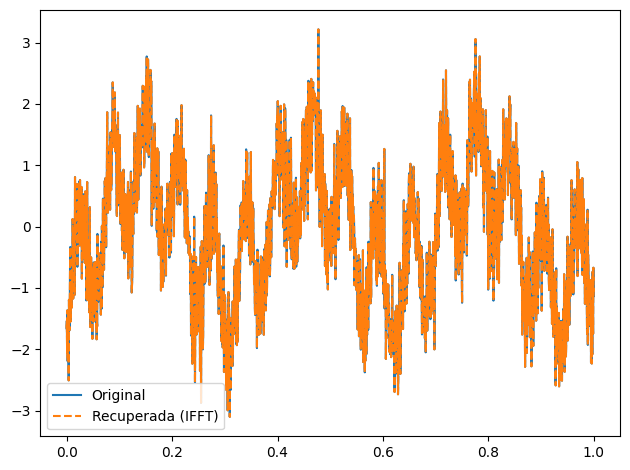

In [95]:
from scipy.fft import ifft
t = np.linspace(0, 1, 2000, endpoint=False)

recovered = ifft(dft_con_ruido)
# GRAFICAR Transformada de Fourier inversa
# Gráfica para comparar
plt.plot(t, señal_con_ruido, label='Original')
plt.plot(t, recovered, '--', label='Recuperada (IFFT)')
plt.legend()
plt.tight_layout()
plt.show()


Haciendo uso de la transformada de fourier realizada en el punto 4.3 mas la funcion "ifft" de la libreria scipy, se hace un grafico el cual reconstruye la señal orginal generada en el punto 4.2, lo cual se aprecia en la imagen generada por el codigo previo, y por lo que se puede observar al compararla con la señal orginal, esta reconstruccion se hizo de manera existosa.

La funcion ifft() (Inverse Fast Fourier Transform) de la libreria scipy, cumple la funcion de tomar una señal en el dominio de la frecuencia y la pasa al dominio del tiempo, basado en el algoritmo de la Transformada Inversa Discreta de Fourier (IDFT).


# 5 Explica tus hallazgos (explicar basado en la teoría)
- Explica que comprobaste con relación al sampleo de señales.
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.
- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?

- En relacion al muestreo de señales, se puede comprobar que el teorema de Nyquist el cual propone que el muestreo de las señales se debe hacer de almenos 2 veces la frecuencia de la señal a muestrear se cumple, pero esta tiene una baja definicion de la funcion original, en la cual se pierde un monton de informacion que esta pueda tener, por lo que usar una frecuencia de muestreo de 5 veces mayor a la frecuencia de la señal seria lo ideal, pero esta requiere de muchos recursos, ya que la cantidad de informacion recuperada es mayor, y tambien implica que se debe tener dispositivos mas sofisticados para la captura de señales de mayor frecuencia.

-En esta experiencia solo se genera el "ruido" a partir de la reconstruccion de señales a partir del muestreo, lo cual en si no es considerado ruido si no que perdida de informacion de la señal, y el otro ruido generado es en el punto 4.2, el cual agrega informacion a la señal original y tambien agrega nuevas componentes espectrales a esta misma, por lo que se obtiene una señal distorcionada con respecto a la señal original.

-Los resultados de las transformadas de Fourier representan las frecuencias presentes en las señales estudiadas y la magnitud de estas, lo cual es informacion importante para la reconstruccion de esta a partir de la transformada inversa de Fourier.

## 4. Referencias
<p align="justify">
    

[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html